<a href="https://colab.research.google.com/github/IamAlaric1999/Ipynb-First-assignment/blob/main/Homework6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import nltk

nltk.download('stopwords')

nltk.download('wordnet')

nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
!pip install requests

import requests

target_url ='http://www.gutenberg.org/files/2265/2265.txt'

response = requests.get(target_url)

data = response.text

In [35]:
blob=TextBlob(data)

In [36]:
import imageio

image_file="https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"

mask_image =imageio.v3.imread(image_file)

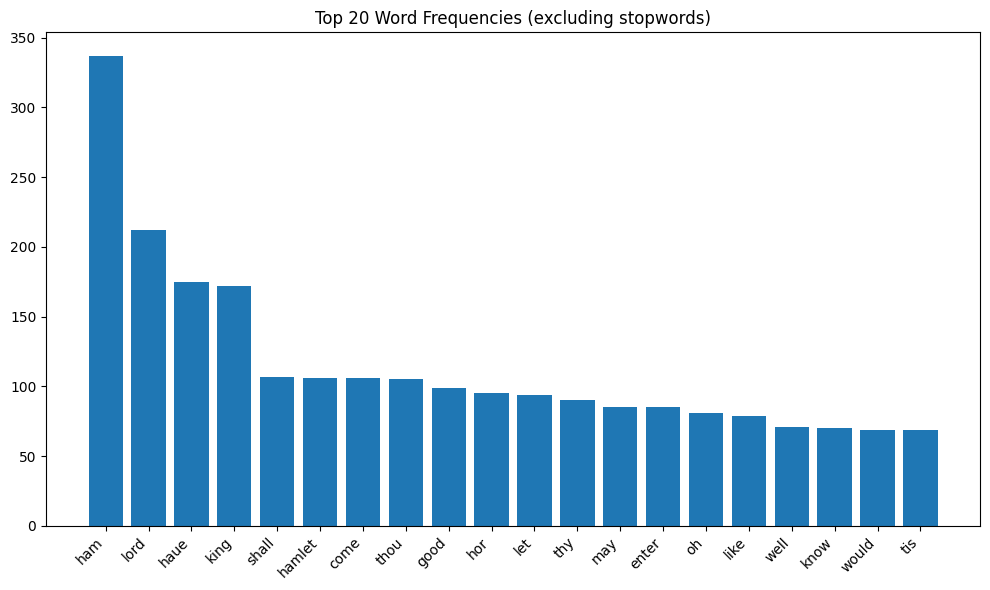

In [41]:
import string
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
try:
    nltk.data.find('corpora/stopwords')
except nltk.downloader.DownloadError:
    nltk.download('stopwords')

# The text data is already in the 'data' variable from a previous step.
# We will process the 'data' variable directly instead of reading from a file.

# Define a translator to remove punctuation
punctuation_translator = str.maketrans('', '', string.punctuation)

# Remove punctuation, convert to lowercase, and split into words
# Ensure words are alphabetic after removing punctuation
cleaned_words = [word.translate(punctuation_translator).lower() for word in data.split() if word.translate(punctuation_translator).isalpha()]

# Define the set of English stop words
stop_words = set(stopwords.words('english'))

# Remove stop words from the cleaned words
words_without_stopwords = [word for word in cleaned_words if word not in stop_words]

# Calculate the frequency of each word after removing stop words
word_frequencies = Counter(words_without_stopwords)

# Get the top 20 most common words and their frequencies
top_20_word_frequencies = word_frequencies.most_common(20)

# Separate the words and their frequencies for plotting
top_words = [word[0] for word in top_20_word_frequencies]
frequencies = [word[1] for word in top_20_word_frequencies]

# Create and display a bar plot of the top 20 word frequencies
plt.figure(figsize=(10, 6)) # Adjust figure size for better readability
plt.bar(top_words, frequencies)
plt.xticks(rotation = 45, ha='right'); # Rotate labels and align to the right
plt.title('Top 20 Word Frequencies (excluding stopwords)')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

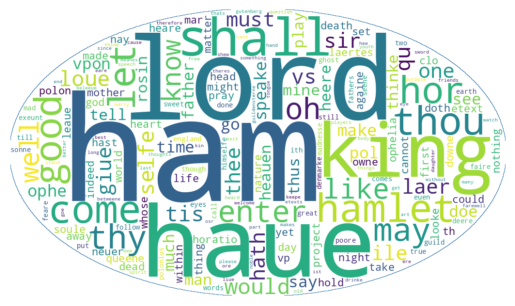

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure word_frequencies is available from the previous cell
# word_frequencies = Counter(words_without_stopwords) # This is already done in the previous cell

# Generate the word cloud from the word frequencies
# Use mask_image from cell qXo80myDwEE8 if it is intended as a mask
word_cloud = WordCloud(collocations = False, background_color = 'white', mask=mask_image, contour_width=1, contour_color='steelblue').generate_from_frequencies(word_frequencies)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()